In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
f = '_기간별평균환율조회(월별)_20190702.xls'
f = 'japan_money.csv'
df = pd.read_csv(f, encoding='cp949', index_col=0, header=1)
df.shape


(494, 8)

In [12]:
df.head()

,보내실때,받으실때,사실때,파실때,Unnamed: 5,(전일대비),Unnamed: 7,Unnamed: 8
2019.07.02,"1,087.53","1,066.65","1,095.93","1,058.25","1,090.01/td>","1,077.09","1,066.80",0.92
NaN,NaN,NaN,NaN,NaN,NaN,상승2.87,NaN,NaN
2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43","1,087.11/td>","1,074.22","1,066.74",0.92
NaN,NaN,NaN,NaN,NaN,NaN,상승1.42,NaN,NaN
2019.06.28,"1,083.20","1,062.40","1,091.57","1,054.03","1,085.67/td>","1,072.80","1,073.35",0.92


In [15]:
#데이터 정제
df4 = df.iloc[:,:4]
df4.head()

,보내실때,받으실때,사실때,파실때
2019.07.02,"1,087.53","1,066.65","1,095.93","1,058.25"
NaN,NaN,NaN,NaN,NaN
2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43"
NaN,NaN,NaN,NaN,NaN
2019.06.28,"1,083.20","1,062.40","1,091.57","1,054.03"


In [16]:
df4 = df4.dropna()
df4.head()

,보내실때,받으실때,사실때,파실때
2019.07.02,"1,087.53","1,066.65","1,095.93","1,058.25"
2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43"
2019.06.28,"1,083.20","1,062.40","1,091.57","1,054.03"
2019.06.27,"1,082.90","1,062.10","1,091.26","1,053.74"
2019.06.26,"1,086.17","1,065.31","1,094.56","1,056.92"


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2019.07.02 to 2018.06.29
Data columns (total 4 columns):
보내실때    248 non-null object
받으실때    248 non-null object
사실때     248 non-null object
파실때     248 non-null object
dtypes: object(4)
memory usage: 9.7+ KB


In [20]:
# 전처리 (문자 > 숫자) preprocessing
df4 = df4.replace(',','',regex=True)
df4 = df4.astype(np.float)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2019.07.02 to 2018.06.29
Data columns (total 4 columns):
보내실때    248 non-null float64
받으실때    248 non-null float64
사실때     248 non-null float64
파실때     248 non-null float64
dtypes: float64(4)
memory usage: 9.7+ KB


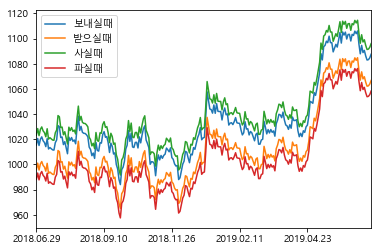

In [23]:
plt.rc('font', family='Malgun Gothic')
df4.iloc[::-1].plot()

In [42]:
f2 = '8.8.1.1 주요국통화의 대원화 환.csv'
df2 = pd.read_csv(f2, encoding='cp949', index_col=0, header=3)
df2 = df2.dropna()
df2.head()

,원자료,원자료.1
변환,,
2018/06/29,"1,121.70","1,014.79"
2018/07/02,"1,117.20","1,009.26"
2018/07/03,"1,117.40","1,008.26"
2018/07/04,"1,121.10","1,014.34"
2018/07/05,"1,115.30","1,009.55"


In [71]:
df2 = df2.replace(',','',regex=True).astype(np.float)

In [72]:
window_week=4
window_day=window_week * 5 # 5일
predict_day = 5
window_day

20

X, Y 갯수 체크
- 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20+5)=1샘플, 총 5샘플
- 현재 데이터 248ㄱ 샘플, 총 224 쌍의 X,Y를 만들어야 합니다.

In [73]:
len(df2), window_day+predict_day, len(df2) - (window_day+predict_day-1)
# x : 과거의 2일치
# y : 미래의 2일치
# data : 1,2,3,4,5일
# X : 1,2, - Y,3,4

(248, 25, 224)

In [74]:
offset = window_day+predict_day-1
offset, len(df2)-offset

(24, 224)

In [75]:
X = df2.iloc[offset:] # 최근 데이터 24개 빼고
y= df2.iloc[offset:] #과거 데이터 24개 빼고
X.shape, y.shape


((224, 2), (224, 2))

In [76]:
before = df2.iloc[:-predict_day] # 최근 데이터 5개 빼고
later = df2.iloc[window_day:] # 과거 데이터 20개 빼고
before.shape, later.shape

((243, 2), (228, 2))

- x[224, 2*20], y[224, 2*5]

In [77]:
m = len(df2) - (predict_day + window_day -1)
m

224

In [78]:
x_list = []
y_list = []
for i in range(m):
    x = df2.iloc[i:i+window_day] # 1 to 21 ... 20일간의 데이터
    y = df2.iloc[i+window_day:i+window_day+predict_day] # 그다음 5일간의 데이터
    x_list.append(x.values) # 날짜 인덱스 빼고 값만 저장
    y_list.append(y.values)

In [79]:
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape # (m-instance, day, 특징 수(달러, 엔화))

((224, 20, 2), (224, 5, 2))

In [80]:
X = np.reshape(X, [m,-1])
y = np.reshape(y, [m,-1])
X.shape, y.shape # 달러, 엔화, 달러, 엔화...

((224, 40), (224, 10))

In [81]:
# train / test 분리
offset = 30 # 테스트셋
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 40), (30, 40), (194, 10), (30, 10))

In [83]:
y

array([[1119.6 , 1006.52, 1120.  , ..., 1000.22, 1119.3 , 1002.51],
       [1120.  , 1009.46, 1116.7 , ..., 1002.51, 1122.6 , 1005.6 ],
       [1116.7 , 1005.95, 1117.9 , ..., 1005.6 , 1128.1 , 1014.16],
       ...,
       [1162.  , 1082.19, 1157.9 , ..., 1075.  , 1156.8 , 1073.35],
       [1157.9 , 1078.97, 1154.7 , ..., 1073.35, 1156.4 , 1066.74],
       [1154.7 , 1077.35, 1158.2 , ..., 1066.74, 1155.4 , 1066.8 ]])

In [84]:
from sklearn.linear_model import LinearRegression, Ridge
lr = Ridge().fit(X_train, y_train)

In [85]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9205409191491469, -0.6542108232125314)

In [86]:
lr.predict(X_test)

array([[1128.00560624, 1016.29562308, 1128.46735425, 1015.50289483,
        1128.52122243, 1014.28682673, 1129.86431378, 1015.37692653,
        1132.9745746 , 1017.5184348 ],
       [1119.45404447, 1006.1940508 , 1120.20580579, 1004.89124899,
        1120.57491748, 1004.40123283, 1125.57089001, 1007.91727823,
        1124.11213516, 1005.86215353],
       [1120.60966618, 1008.55027052, 1120.72254546, 1007.75605251,
        1125.59943393, 1011.91303991, 1124.37528524, 1009.50997562,
        1129.44554272, 1013.46790252],
       [1117.19809504, 1006.46075222, 1121.4465924 , 1009.79587075,
        1119.98187531, 1008.37422672, 1124.69818496, 1010.7093664 ,
        1130.94288178, 1016.19873811],
       [1121.99871564, 1002.6584493 , 1120.47341727, 1001.83406024,
        1125.37554226, 1003.43495265, 1131.77966314, 1010.5982368 ,
        1135.88141516, 1016.19062144],
       [1118.28589558, 1003.21079606, 1122.55899248, 1004.03472994,
        1128.75254144, 1012.41476134, 1132.5173882 , 1016

In [112]:
# 미래의 환률그래프 시각화
최근20일데이터 = df2.iloc[-window_day:].values.reshape(1, -1)
미래의5일예측 = lr.predict(최근20일데이터)
미래의5일예측2 = np.reshape(미래의5일예측, [predict_day, 2]) # 다시 3차원으로
미래의5일예측2.shape

(5, 2)

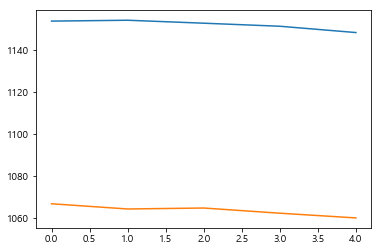

In [113]:
p = plt.plot(미래의5일예측2)

In [114]:
미래의5일예측2

array([[1153.97892309, 1066.84107246],
       [1154.39307339, 1064.3510122 ],
       [1152.98395508, 1064.80831854],
       [1151.52830773, 1062.33486002],
       [1148.51799407, 1060.0881306 ]])

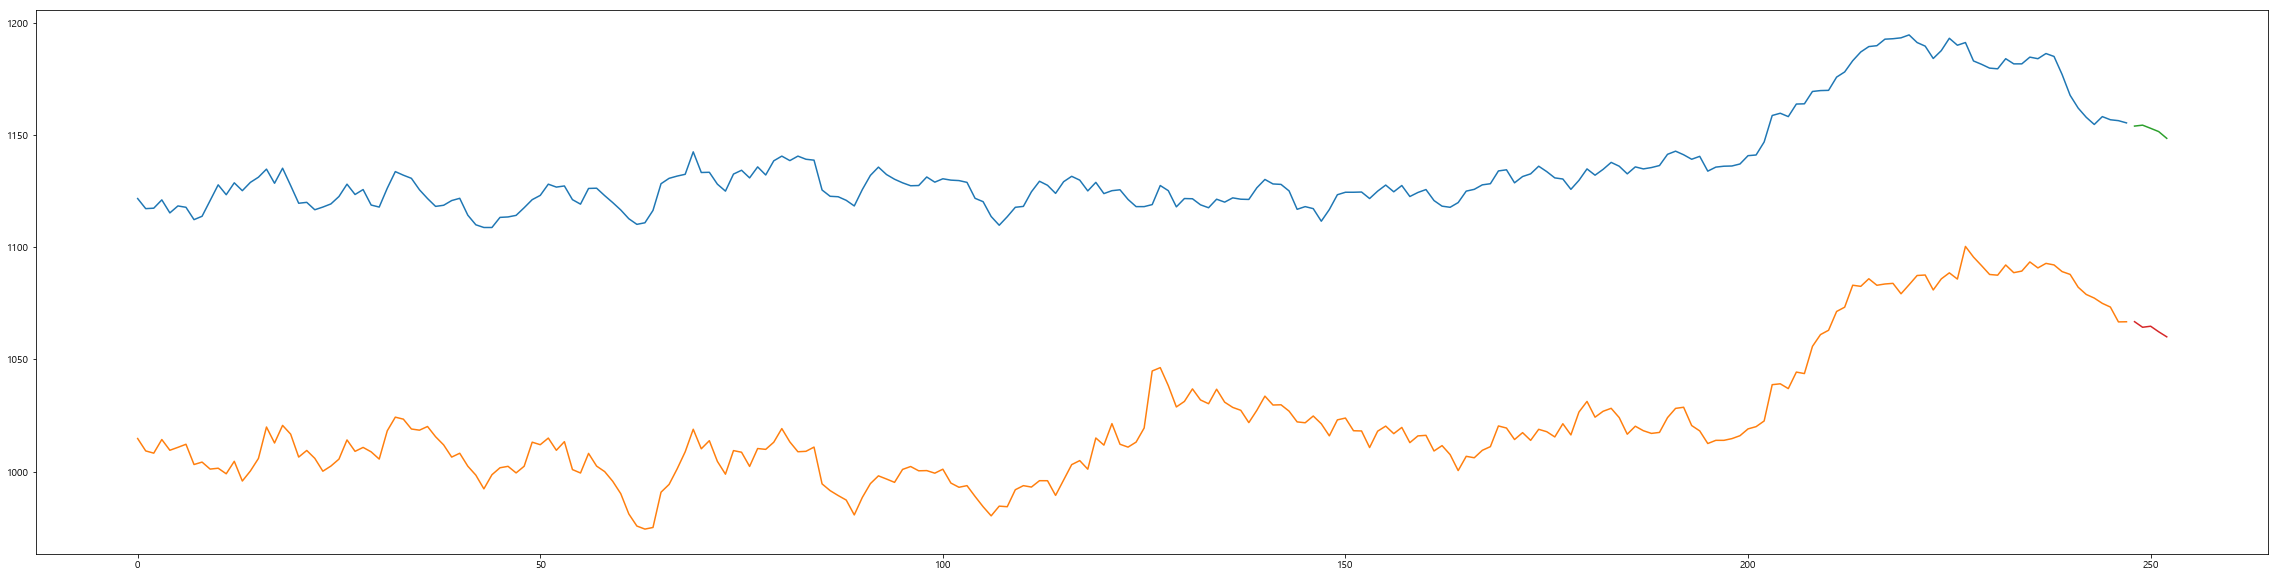

In [128]:
usa = df2.iloc[:,0].values
japan = df2.iloc[:,1].values
x_num = np.arange(len(usa))
x_num2 = np.arange(len(usa), len(usa)+len(미래의5일예측2))
plt.figure(figsize=(40,10))
plt.plot(x_num, usa)
plt.plot(x_num, japan)
plt.plot(x_num2, 미래의5일예측2[:,0])
plt.plot(x_num2, 미래의5일예측2[:,1])
